### House Price Prediction - Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Train data

In [2]:
raw_train_data = pd.read_csv("train_data_House_Price_Kaggle.csv")
raw_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
raw_train_data.shape

(1460, 81)

In [4]:
raw_train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### Test data

In [5]:
raw_test_data = pd.read_csv("test_data_House_Price_Kaggle.csv")
raw_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
raw_test_data.shape

(1459, 80)

### Missing data

In [7]:
# lets check the missing values from the train dataset..
train_data_missing_val = raw_train_data.isnull().sum().sort_values(ascending=False)
percentage  = (raw_train_data.isnull().sum()/raw_train_data.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([train_data_missing_val,percentage], axis=1, keys=['train_data_missing_val','percentage'])
missing_data_train

,train_data_missing_val,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [8]:
# lets check the missing values from the test dataset..
test_data_missing_val = raw_test_data.isnull().sum().sort_values(ascending=False)
percentage  = (raw_test_data.isnull().sum()/raw_test_data.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([test_data_missing_val,percentage], axis=1, keys=['test_data_missing_val','percentage'])
missing_data_test.head(50)

,test_data_missing_val,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [9]:
##there are so many missing values in both train and test dataset.. we need to find out if there is a relationship between
##the features with missing values and the 'saleprice'

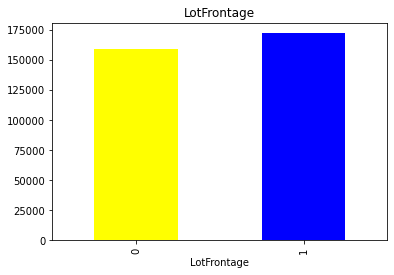

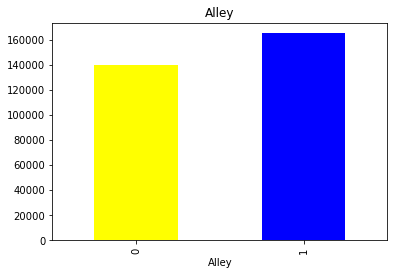

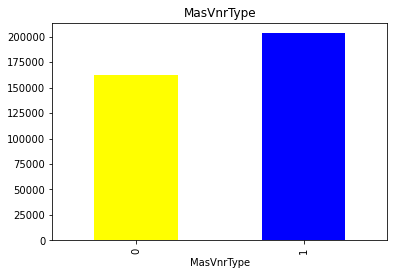

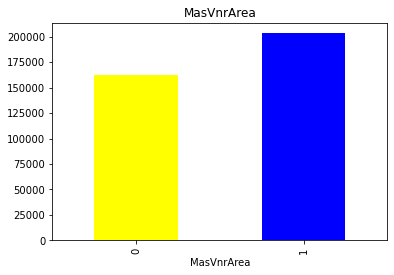

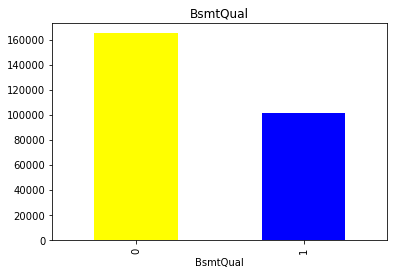

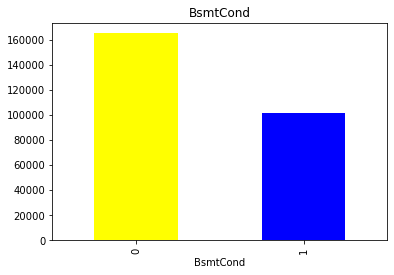

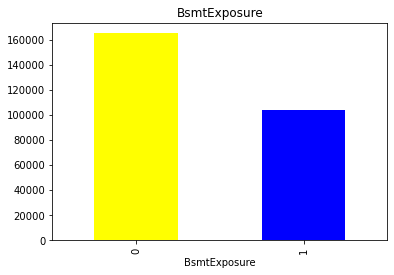

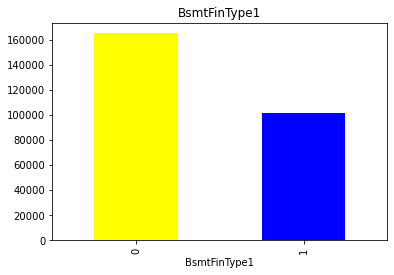

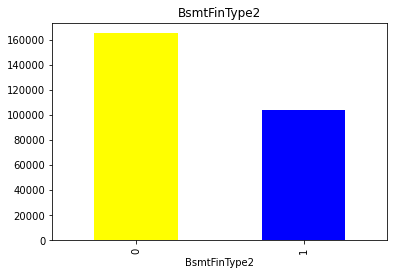

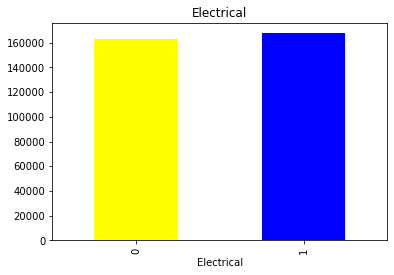

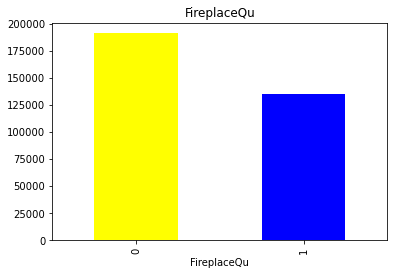

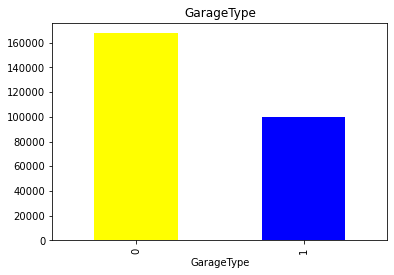

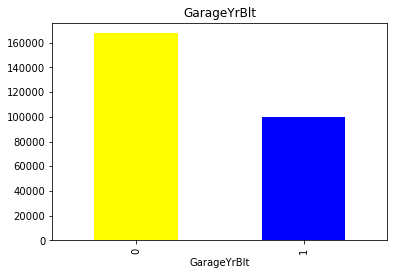

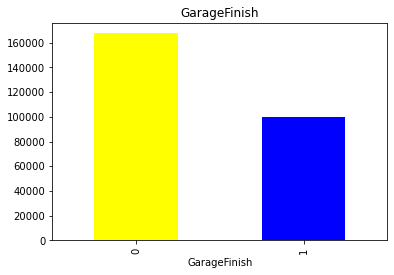

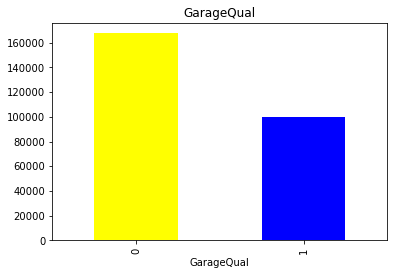

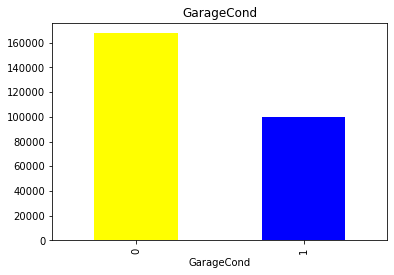

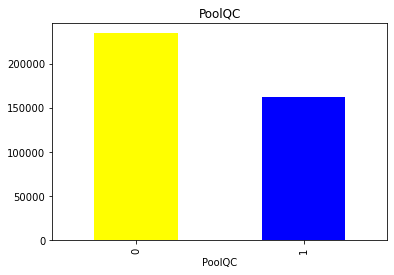

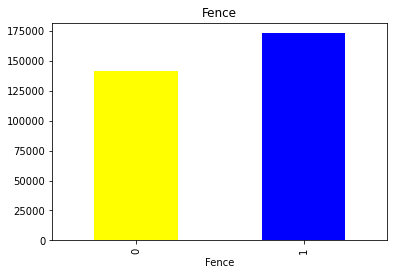

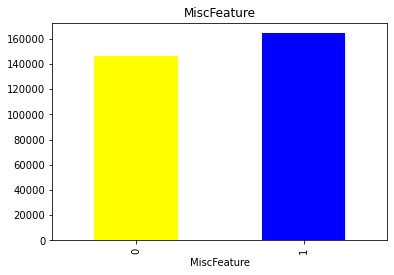

In [10]:
feature_with_na = [feature for feature in raw_train_data.columns if raw_train_data[feature].isnull().sum()>=1]

for feature in feature_with_na:
    data_tr = raw_train_data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data_tr[feature] = np.where(data_tr[feature].isnull(), 1, 0)
    
    data_tr.groupby(feature)['SalePrice'].median().plot.bar(color=['yellow', 'blue'])
    plt.title(feature)
    plt.show()        

In [11]:
## from the above plot we can see there is a clear relationship between the features with missing values and
## the dependent variable 'saleprice'.

### Numerical values

In [12]:
train_num_var = [feature for feature in raw_train_data.columns if raw_train_data[feature].dtypes != 'O']

print("Number of numerical columns in train data :", len(train_num_var))

raw_train_data[train_num_var].head()


Number of numerical columns in train data : 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables - Analyzing the Year features

In [13]:
year_feature = [feature for feature in train_num_var if 'Yr' in feature or 'Year' in feature] 
year_feature


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, raw_train_data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'SalePrice vs YrSold')

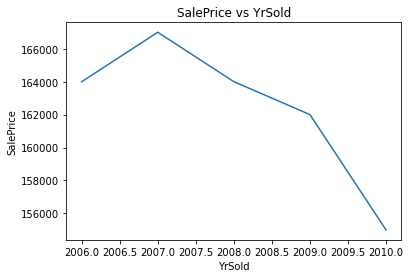

In [15]:
## We will check whether there is a relation between year the house is sold and the sales price

raw_train_data.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel("YrSold")
plt.ylabel("SalePrice")
plt.title("SalePrice vs YrSold")

In [16]:
## As the Yrsold increases the SalePrice decreases..  

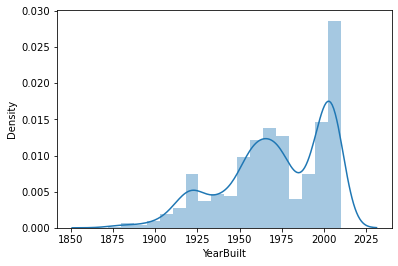

In [17]:
## lets see the distribution of the Year features..

sns.distplot(raw_train_data['YearBuilt'])

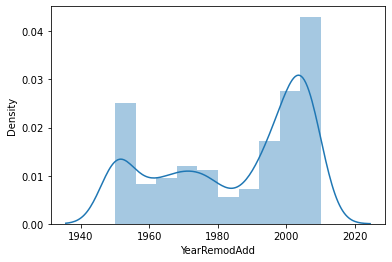

In [18]:
sns.distplot(raw_train_data['YearRemodAdd'])

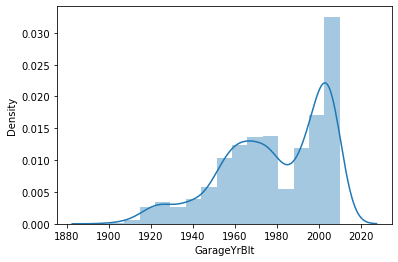

In [19]:
sns.distplot(raw_train_data['GarageYrBlt'])

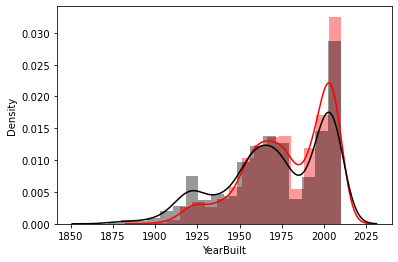

In [20]:
## By looking at the above plots, the variables YearBuilt and GarageYrBlt has almost the same distribution.. 
# lets confirm that again..

sns.distplot(raw_train_data['GarageYrBlt'], color = 'r');
sns.distplot(raw_train_data['YearBuilt'], color = 'k');

In [21]:
# Since there is so much multicollinearity between these variables we'll remove one of them

### Discrete Numerical variables

In [22]:
## Numerical variables have 2 categories.. 1. Continous 2. Discrete
## lets analyse the Discrete Numerical variables here..
dis_num_var = [feature for feature in train_num_var if len(raw_train_data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Number of discrete numerical features : {} ".format(len(dis_num_var)))

Number of discrete numerical features : 17 


In [23]:
dis_num_var

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

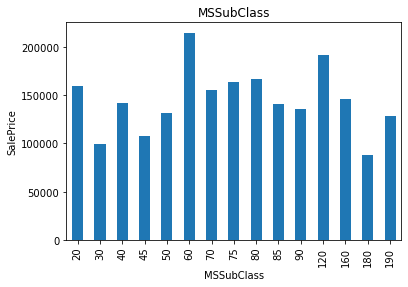

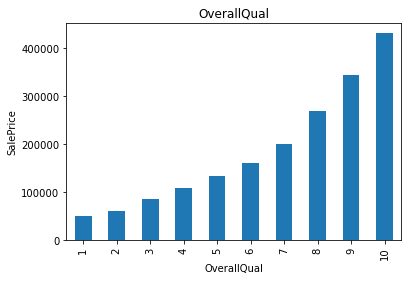

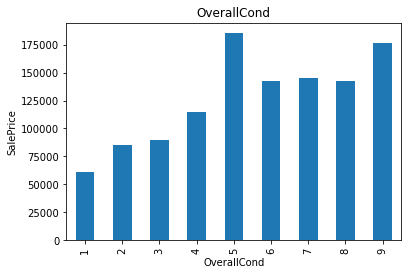

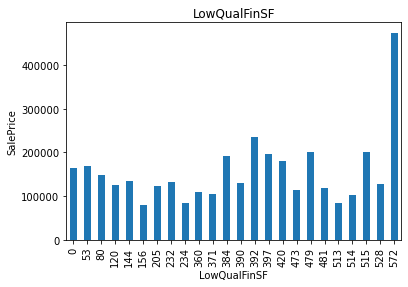

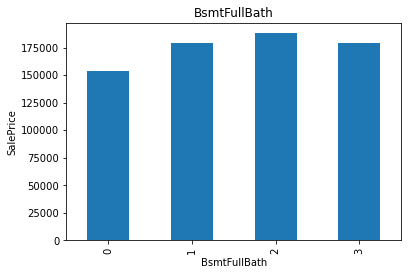

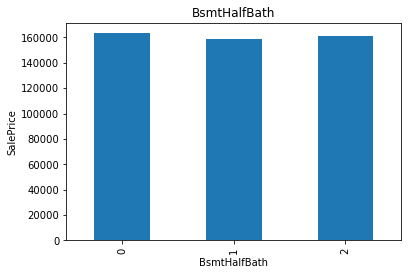

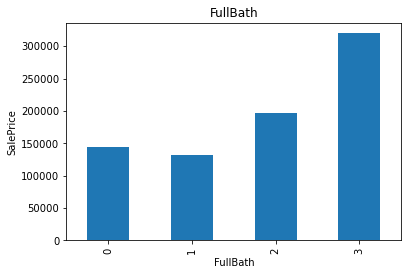

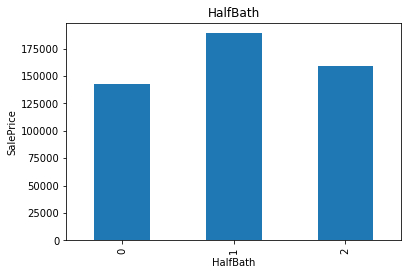

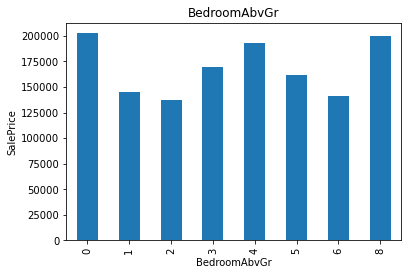

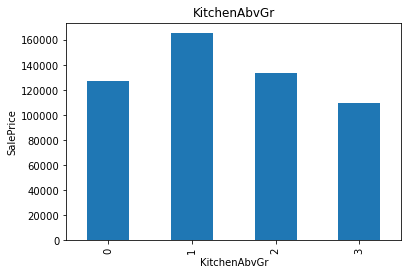

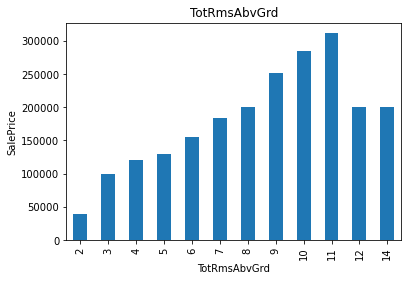

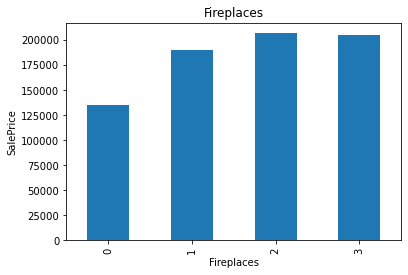

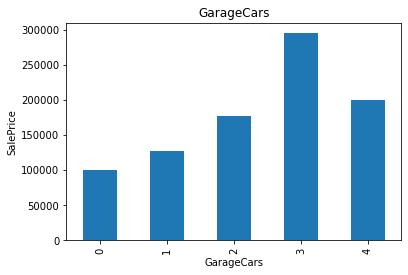

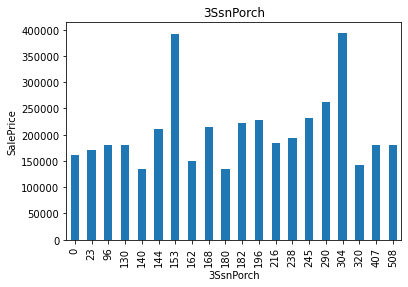

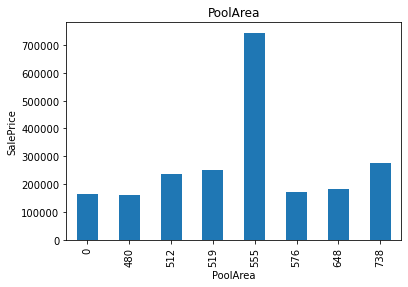

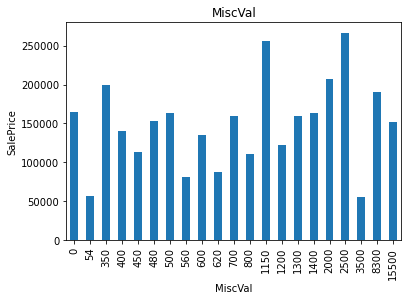

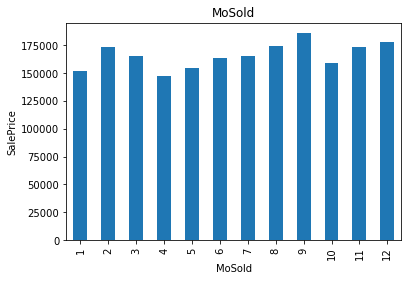

In [24]:
for feature in dis_num_var:
    data_dis = raw_train_data.copy()
    
    data_dis.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show() 
    

In [25]:
# lets work on the continous features..
con_num_var = [feature for feature in train_num_var if feature not in dis_num_var+year_feature+['Id']]
print("number of continous numerical features : {}".format(len(con_num_var)))

number of continous numerical features : 16


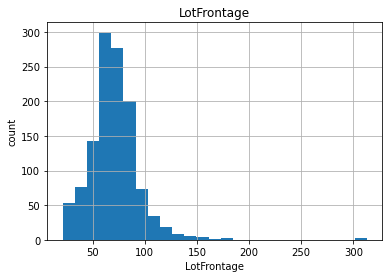

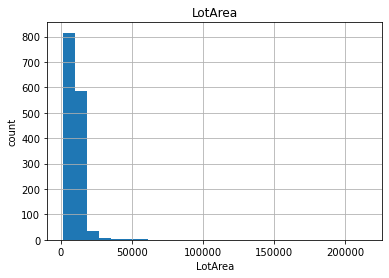

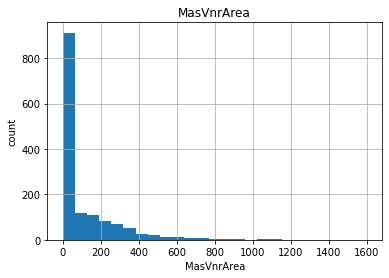

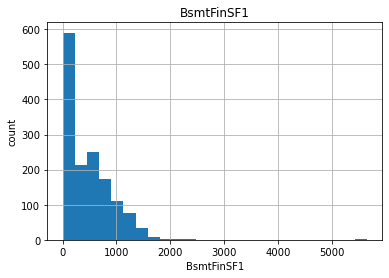

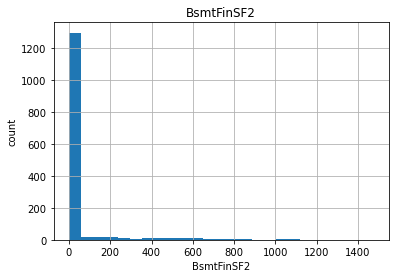

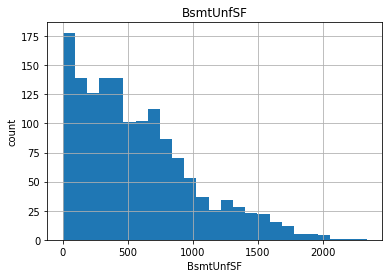

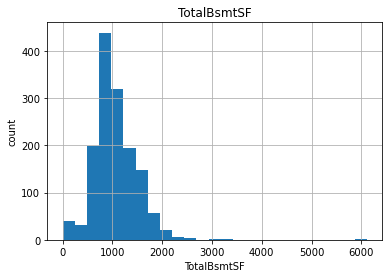

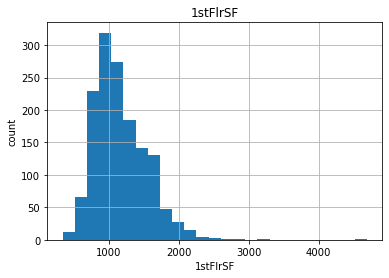

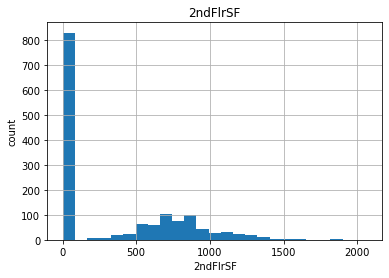

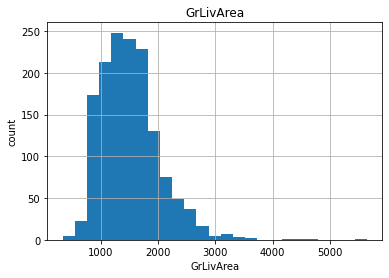

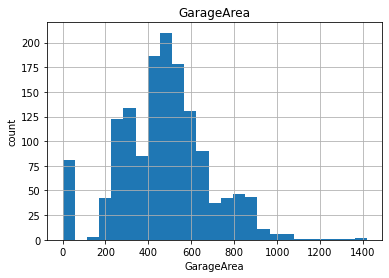

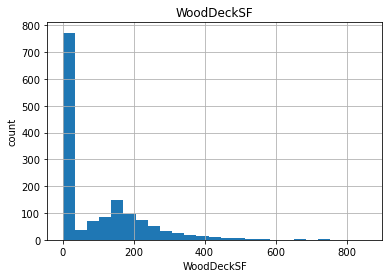

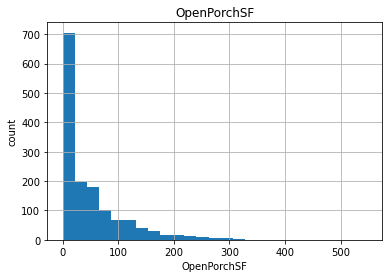

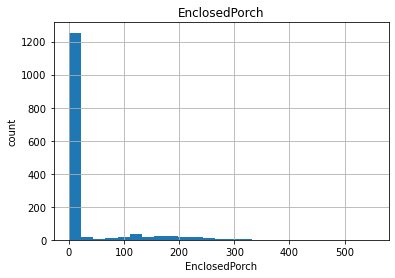

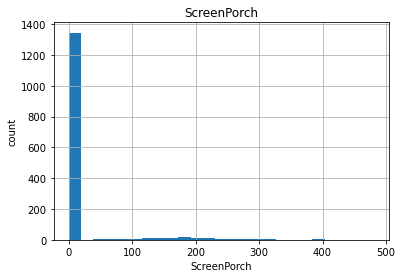

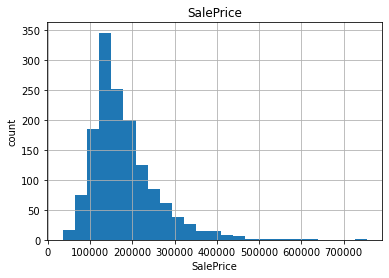

In [26]:
for feature in con_num_var:
    data_con = raw_train_data.copy()
    
    data_con[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()
    
    

In [27]:
raw_train_data[con_num_var].head(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [28]:
### Continuous variable vs SalePrice

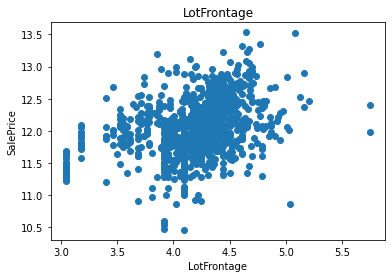

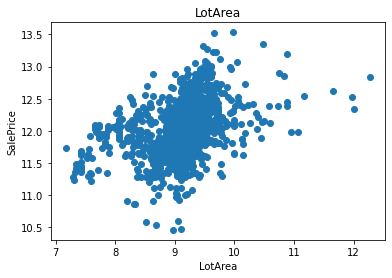

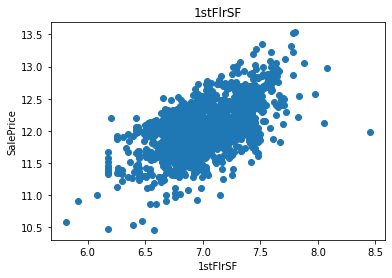

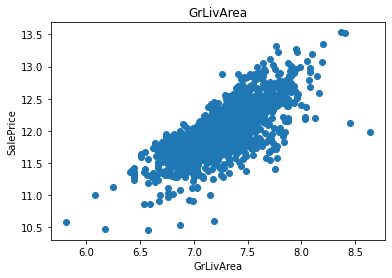

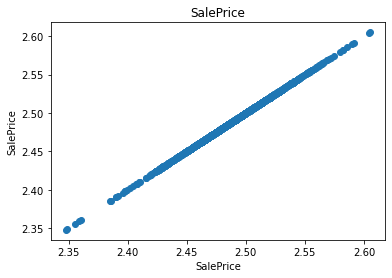

In [29]:
for feature in con_num_var:
    data_sct = raw_train_data.copy()
    if 0 in data_sct[feature].unique():
        pass
    else:
        data_sct[feature] = np.log(data_sct[feature])
        data_sct['SalePrice'] = np.log(data_sct['SalePrice'])
        plt.scatter(data_sct[feature], data_sct['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()      


### checking for Outliers

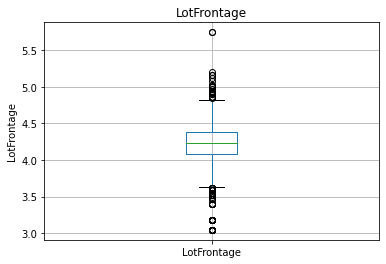

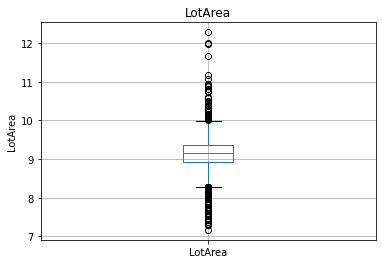

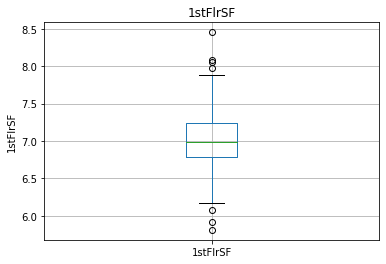

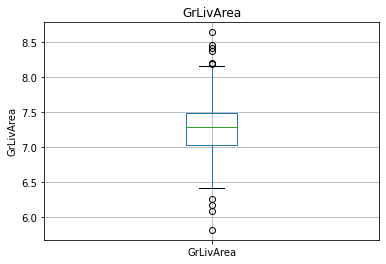

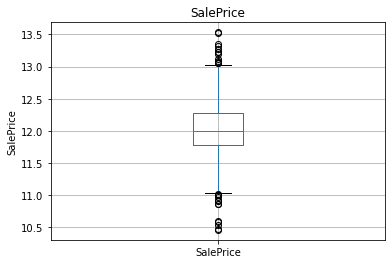

In [30]:
for feature in con_num_var:
    data_out = raw_train_data.copy()
    if 0 in data_out[feature].unique():
        pass
    else:
        data_out[feature] = np.log(data_out[feature]) 
        data_out.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
             

In [31]:
## Outliers are big problem so it needs to addressed also..

#### Dependent variable

In [32]:
## lets look more closely at the dependent variable...
print(raw_train_data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


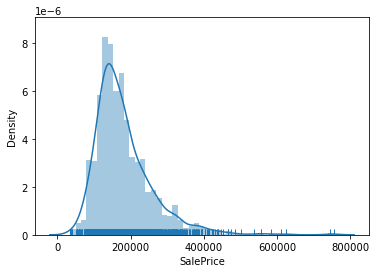

In [33]:
 sns.distplot(raw_train_data['SalePrice'],rug=True)

In [34]:
print("Skewness: %f" % raw_train_data['SalePrice'].skew())
print("Kurtosis: %f" % raw_train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [35]:
## skewness > 0.5 is considered to moderately skewwed. kurtosis > 3 is considered to be higly skewwed.

In [36]:

raw_train_data['SalePrice'] = np.log1p(raw_train_data['SalePrice'])
print(" Skewness of Saleprice after log transformation : ", raw_train_data['SalePrice'].skew())

 Skewness of Saleprice after log transformation :  0.12134661989685333


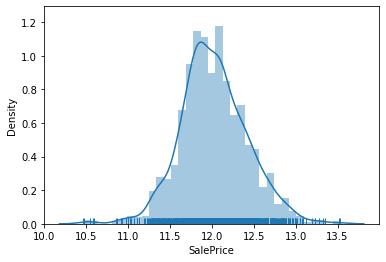

In [37]:
sns.distplot(raw_train_data['SalePrice'], rug=True)

### catagorical features

In [38]:
obj_var = [feature for feature in raw_train_data.columns if raw_train_data[feature].dtypes == 'O']
print("Number of catagorical features: {}".format(len(obj_var)))

Number of catagorical features: 43


In [39]:
raw_train_data[obj_var].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
## lets get the Cardinality of each feature
obj_nunique = list(map(lambda col: raw_train_data[col].nunique(), obj_var))
d = dict(zip(obj_var, obj_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Alley', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('GarageFinish', 3),
 ('PavedDrive', 3),
 ('PoolQC', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('Fence', 4),
 ('MiscFeature', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('FireplaceQu', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

### removing the redundant features

In [41]:
train_true_val = raw_train_data.SalePrice
train_true_val.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [42]:
raw_train_data = raw_train_data.drop(['Id','SalePrice'], axis=1)
raw_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [43]:
test_perd_id = raw_test_data.Id
test_perd_id.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [44]:
raw_test_data = raw_test_data.drop('Id', axis=1)
raw_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
## lets drop the features with more than 90% of the data missing..

feat_to_be_drop = missing_data_train[missing_data_train['percentage']>0.90]
feat_to_be_drop

,train_data_missing_val,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671


In [46]:
raw_train_data.drop(feat_to_be_drop.index, axis=1, inplace=True)
raw_test_data.drop(feat_to_be_drop.index, axis=1, inplace=True)

In [47]:
raw_train_data.shape, raw_test_data.shape

((1460, 76), (1459, 76))

### correlation between the Independent features

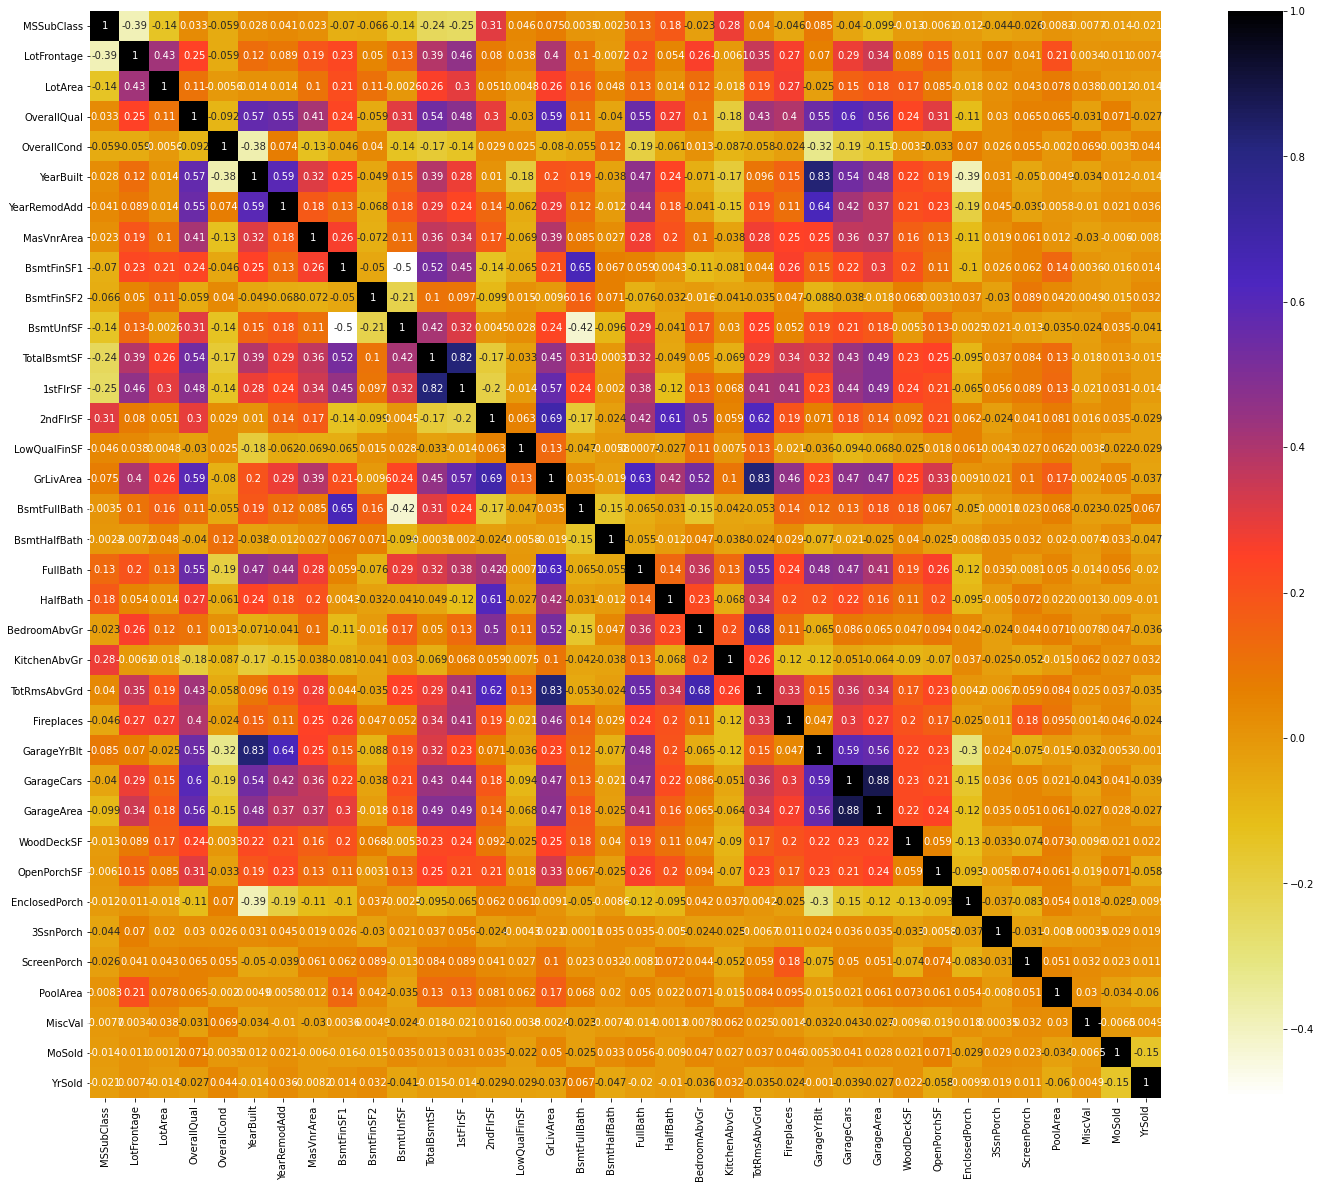

In [48]:
## lets use Heatmap to check for the coorealtion

plt.figure(figsize=(24,20))
train_cor = raw_train_data.corr()
sns.heatmap(train_cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [49]:
# lets use Person Correaltion to see which featrues are Highlt correalted. We set the thresold at 0.7.
# With the following function we can select highly correlated features.
# It will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
            #if corr_matrix.iloc[i, j] > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(raw_train_data, 0.7)
len(set(corr_features))

4

In [51]:
corr_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

In [52]:
# lets drop the Highly correalted features from the train and the test dataset
raw_train_data = raw_train_data.drop(corr_features, axis=1)
raw_test_data = raw_test_data.drop(corr_features, axis=1)

In [53]:
raw_train_data.shape, raw_test_data.shape

((1460, 72), (1459, 72))

### Removing redundancy in catgorical features

In [54]:
cat_feature_train = [feature for feature in raw_train_data.columns if raw_train_data[feature].dtypes == 'O']

cat_feat_to_encode = [feature for feature in cat_feature_train if set(raw_train_data[feature]) == set(raw_test_data[feature])]

cat_feat_to_remove = list(set(cat_feature_train) - set(cat_feat_to_encode))

print('Categorical columns that will be encoded:', cat_feat_to_encode)
print('\nCategorical columns that will be dropped from the dataset:', cat_feat_to_remove)

Categorical columns that will be encoded: ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'Fence', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Utilities', 'KitchenQual', 'Exterior1st', 'HouseStyle', 'Functional', 'GarageQual', 'MSZoning', 'Heating', 'Electrical', 'Condition2', 'SaleType', 'Exterior2nd', 'RoofMatl']


In [55]:
len(cat_feat_to_encode)

27

In [56]:
len(cat_feat_to_remove)

13

In [57]:
raw_train_data = raw_train_data.drop(raw_train_data[cat_feat_to_remove], axis=1)
raw_test_data = raw_test_data.drop(raw_test_data[cat_feat_to_remove], axis=1)

In [58]:
raw_train_data.shape, raw_test_data.shape

((1460, 59), (1459, 59))

### lets attend the Missing values in both train and test dataset


In [59]:
## missing values in the numerical features(train)
num_miss_var_train = [feature for feature in raw_train_data.columns if raw_train_data[feature].dtypes!='O' and raw_train_data[feature].isnull().sum()>=1]

for feature in num_miss_var_train:
    print("{} : {}% missing value".format(feature, np.around(raw_train_data[feature].isnull().mean(), 4)))

LotFrontage : 0.1774% missing value
MasVnrArea : 0.0055% missing value


In [60]:
## LotFrontage has many outliers.. so its best to take the median value

avg_LotFrontage  = raw_train_data["LotFrontage"].astype("float64").median(axis=0)
print("Average of LotFrontage:", avg_LotFrontage)

raw_train_data['LotFrontage'] = raw_train_data['LotFrontage'].fillna(avg_LotFrontage) 
    

Average of LotFrontage: 69.0


In [61]:
raw_train_data['MasVnrArea'] = raw_train_data['MasVnrArea'].fillna(0.0)

In [62]:
raw_train_data[num_miss_var_train].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

In [63]:
## missing values in the numerical features(test)
num_miss_var_test = [feature for feature in raw_test_data.columns if raw_test_data[feature].dtypes!='O' and raw_test_data[feature].isnull().sum()>=1]

for feature in num_miss_var_test:
    print("{} : {}% missing value".format(feature, np.around(raw_test_data[feature].isnull().mean(), 4)))

LotFrontage : 0.1556% missing value
MasVnrArea : 0.0103% missing value
BsmtFinSF1 : 0.0007% missing value
BsmtFinSF2 : 0.0007% missing value
BsmtUnfSF : 0.0007% missing value
TotalBsmtSF : 0.0007% missing value
BsmtFullBath : 0.0014% missing value
BsmtHalfBath : 0.0014% missing value
GarageCars : 0.0007% missing value


In [64]:
## LotFrontage has many outliers.. so its best to take the median value 

avg_LotFrontage_test  = raw_test_data["LotFrontage"].astype("float64").median(axis=0)
print("Average of LotFrontage:", avg_LotFrontage_test)

raw_test_data['LotFrontage'] = raw_test_data['LotFrontage'].fillna(avg_LotFrontage_test) 

Average of LotFrontage: 67.0


In [65]:
num_miss_var_test = ['MasVnrArea',
                     'BsmtFinSF1',
                     'BsmtFinSF2',
                     'BsmtUnfSF',
                     'TotalBsmtSF',
                     'BsmtFullBath',
                     'BsmtHalfBath',
                     'GarageCars']

for feature in num_miss_var_test:
    feat_mean  = raw_test_data[feature].mean()    
    raw_test_data[feature].fillna(feat_mean, inplace=True)
    
raw_test_data[num_miss_var_test].isnull().sum() 

MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
dtype: int64

In [66]:
#raw_test_data.isnull().sum() 

### Missing values in Catagorical features

In [67]:
cat_miss_var_train = [feature for feature in raw_train_data.columns if raw_train_data[feature].dtypes=='O' and raw_train_data[feature].isnull().sum()>=1]

for feature in cat_miss_var_train:
    print("{} : {}% of missing values".format(feature, np.around(raw_train_data[feature].isnull().mean(),4)))

MasVnrType : 0.0055% of missing values
BsmtQual : 0.0253% of missing values
BsmtCond : 0.0253% of missing values
BsmtExposure : 0.026% of missing values
BsmtFinType1 : 0.0253% of missing values
BsmtFinType2 : 0.026% of missing values
FireplaceQu : 0.4726% of missing values
GarageType : 0.0555% of missing values
GarageFinish : 0.0555% of missing values
GarageCond : 0.0555% of missing values
Fence : 0.8075% of missing values


In [68]:
## lets do value counts for the excisting values in the categorical features which are having missing values

In [69]:
raw_train_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [70]:
raw_train_data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [71]:
raw_train_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [72]:
raw_train_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [73]:
raw_train_data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [74]:
raw_train_data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [75]:
raw_train_data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [76]:
raw_train_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [77]:
raw_train_data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [78]:
raw_train_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [79]:
raw_train_data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [80]:
## lets fill up the above features with the mode value

for feature in cat_miss_var_train:   
    
    mode_val = raw_train_data[feature].value_counts().idxmax()
    raw_train_data[feature].fillna(mode_val,inplace=True)
    
raw_train_data[cat_miss_var_train].isnull().sum()
        

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageCond      0
Fence           0
dtype: int64

In [81]:
#lets do the same for the catagorical features in the test data
cat_miss_var_test = [feature for feature in raw_test_data.columns if raw_test_data[feature].dtypes=='O' and raw_test_data[feature].isnull().sum()>=1]

for feature in cat_miss_var_test:
    print("{} : {}% of missing values".format(feature, np.around(raw_test_data[feature].isnull().mean(),4)))

MasVnrType : 0.011% of missing values
BsmtQual : 0.0302% of missing values
BsmtCond : 0.0308% of missing values
BsmtExposure : 0.0302% of missing values
BsmtFinType1 : 0.0288% of missing values
BsmtFinType2 : 0.0288% of missing values
FireplaceQu : 0.5003% of missing values
GarageType : 0.0521% of missing values
GarageFinish : 0.0535% of missing values
GarageCond : 0.0535% of missing values
Fence : 0.8012% of missing values


In [82]:
for feature in cat_miss_var_test:   
    
    mode_val = raw_test_data[feature].value_counts().idxmax()
    raw_test_data[feature].fillna(mode_val,inplace=True)
    
raw_test_data[cat_miss_var_test].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageCond      0
Fence           0
dtype: int64

### Numerical variable: Skewness

In [83]:
## lets fix the skewness in the Continuous Numeric variables of the train dataset..

from scipy.stats import norm, skew

num_feats_train = raw_train_data.dtypes[raw_train_data.dtypes != 'O'].index
skew_feats_train = raw_train_data[num_feats_train].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew_train = skew_feats_train[abs(skew_feats_train) > 0.5]
high_skew_train

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
YearRemodAdd     -0.503044
YearBuilt        -0.612831
dtype: float64

In [84]:
for feature in high_skew_train.index:
    raw_train_data[feature] = np.log1p(raw_train_data[feature])

In [85]:
## now, lets do the same for the numeric features in the test dataset..

num_feats_test = raw_test_data.dtypes[raw_test_data.dtypes != 'O'].index
skew_feats_test = raw_test_data[num_feats_test].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew_test = skew_feats_test[abs(skew_feats_test) > 0.5]
high_skew_test


PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
BsmtFinSF2        4.038570
ScreenPorch       3.784349
BsmtHalfBath      3.778564
LotArea           3.112013
OpenPorchSF       2.685015
MasVnrArea        2.543855
WoodDeckSF        2.128569
MSSubClass        1.345305
BsmtFinSF1        1.164876
GrLivArea         1.129240
BsmtUnfSF         0.919285
2ndFlrSF          0.911944
Fireplaces        0.819015
TotalBsmtSF       0.813031
LotFrontage       0.754415
HalfBath          0.713993
BsmtFullBath      0.649474
YearBuilt        -0.587052
dtype: float64

In [86]:
for feature in high_skew_test.index:
    raw_test_data[feature] = np.log1p(raw_test_data[feature])

#### Resetting the indeces on both train and test data

In [87]:
raw_train_data = raw_train_data.reset_index(drop=True)

In [88]:
raw_test_data = raw_test_data.reset_index(drop=True)

In [89]:
raw_train_data.shape, raw_test_data.shape

((1460, 59), (1459, 59))

### Getting Dummies and Feature Scaling the train dataset 

In [90]:
train_df = raw_train_data.copy() 
train_df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition
0,4.110874,4.189655,9.042040,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,7,1.791759,7.602900,7.602900,Gable,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,Ex,Y,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,0.000000,Gd,Attchd,RFn,2,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,MnPrv,0.0,2,2008,Normal
1,3.044522,4.394449,9.169623,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,6,2.197225,7.589336,7.589336,Gable,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,Ex,Y,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,0.693147,TA,Attchd,RFn,2,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,MnPrv,0.0,5,2007,Normal
2,4.110874,4.234107,9.328212,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,7,1.791759,7.601902,7.602401,Gable,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,Ex,Y,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,TA,Attchd,RFn,2,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,MnPrv,0.0,9,2008,Normal
3,4.262680,4.110874,9.164401,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,7,1.791759,7.557995,7.586296,Gable,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,Gd,Y,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,0.693147,Gd,Detchd,Unf,3,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,MnPrv,0.0,2,2006,Abnorml
4,4.110874,4.442651,9.565284,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,8,1.791759,7.601402,7.601402,Gable,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,Ex,Y,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,0.693147,TA,Attchd,RFn,3,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,MnPrv,0.0,12,2008,Normal


In [91]:
test_df = raw_test_data.copy()
test_df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition
0,3.044522,4.394449,9.360741,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,5,6,7.581720,1961,Gable,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,6.150603,LwQ,4.976734,5.602119,6.783325,TA,Y,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,0.000000,Gd,Attchd,Unf,1.0,TA,Y,4.948760,0.000000,0.0,0.0,4.795791,0.0,MnPrv,0.000000,6,2010,Normal
1,3.044522,4.406719,9.565775,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,6,6,7.580189,1958,Hip,BrkFace,4.691348,TA,TA,CBlock,TA,TA,No,ALQ,6.828712,Unf,0.000000,6.008813,7.192934,TA,Y,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,0.000000,Gd,Attchd,Unf,1.0,TA,Y,5.976351,3.610918,0.0,0.0,0.000000,0.0,MnPrv,9.433564,6,2010,Normal
2,4.110874,4.317488,9.534668,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,5,5,7.599902,1998,Gable,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,6.674561,Unf,0.000000,4.927254,6.834109,Gd,Y,6.553933,0.0,7.396335,0.0,0.0,2,0.693147,3,0.693147,0.693147,TA,Attchd,Fin,2.0,TA,Y,5.361292,3.555348,0.0,0.0,0.000000,0.0,MnPrv,0.000000,3,2010,Normal
3,4.110874,4.369448,9.208238,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,6,6,7.600402,1998,Gable,BrkFace,3.044522,TA,TA,PConc,TA,TA,No,GLQ,6.401917,Unf,0.000000,5.783825,6.831954,Ex,Y,6.520621,0.0,7.380879,0.0,0.0,2,0.693147,3,0.693147,0.693147,Gd,Attchd,Fin,2.0,TA,Y,5.888878,3.610918,0.0,0.0,0.000000,0.0,MnPrv,0.000000,6,2010,Normal
4,4.795791,3.784190,8.518392,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,8,5,7.597396,1992,Gable,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,5.575949,Unf,0.000000,6.925595,7.155396,Ex,Y,0.000000,0.0,7.155396,0.0,0.0,2,0.000000,2,0.693147,0.000000,Gd,Attchd,RFn,2.0,TA,Y,0.000000,4.418841,0.0,0.0,4.976734,0.0,MnPrv,0.000000,1,2010,Normal


In [92]:
cat_dummies_train = pd.get_dummies(train_df[cat_feat_to_encode], drop_first=True)
cat_dummies_train.head() 

,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [93]:
cat_dummies_train.shape

(1460, 118)

In [94]:
num_train_df = train_df.select_dtypes(exclude='object')
num_train_df.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,7,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,0.000000,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008
1,3.044522,4.394449,9.169623,6,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,0.693147,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007
2,4.110874,4.234107,9.328212,7,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008
3,4.262680,4.110874,9.164401,7,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,6.629363,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,0.693147,3,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006
4,4.110874,4.442651,9.565284,8,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,0.693147,3,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008


In [95]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(num_train_df)

num_train_scaled = pd.DataFrame(scalar.transform(num_train_df))
num_train_scaled.columns = num_train_df.columns

num_train_scaled.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.483003,0.413268,0.366271,0.666667,0.682606,0.950951,0.884882,0.716038,0.759508,0.0,0.646838,0.774668,0.884420,0.0,0.577436,0.5,0.00000,0.666667,0.63093,0.375,0.5,0.0,0.50,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.490307,0.391245,0.555556,0.934536,0.760143,0.437057,0.000000,0.797188,0.0,0.728731,0.819153,0.000000,0.0,0.469935,0.0,0.63093,0.666667,0.00000,0.375,0.5,0.5,0.50,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.483003,0.429990,0.422289,0.666667,0.682606,0.936906,0.868404,0.690361,0.716357,0.0,0.783246,0.782930,0.886245,0.0,0.592825,0.5,0.00000,0.666667,0.63093,0.375,0.5,0.5,0.50,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.551764,0.383633,0.390223,0.666667,0.682606,0.319286,0.336710,0.000000,0.622780,0.0,0.811361,0.760436,0.868471,0.0,0.578882,0.5,0.00000,0.333333,0.00000,0.375,0.5,0.5,0.75,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.483003,0.508439,0.468694,0.777778,0.682606,0.929878,0.835423,0.794318,0.750841,0.0,0.798858,0.808002,0.911832,0.0,0.666289,0.5,0.00000,0.666667,0.63093,0.500,0.5,0.5,0.75,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [96]:
num_train_scaled.shape

(1460, 32)

In [97]:
train = pd.concat([num_train_scaled, cat_dummies_train], axis=1)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.483003,0.413268,0.366271,0.666667,0.682606,0.950951,0.884882,0.716038,0.759508,0.0,0.646838,0.774668,0.884420,0.0,0.577436,0.5,0.00000,0.666667,0.63093,0.375,0.5,0.0,0.50,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,0.000000,0.490307,0.391245,0.555556,0.934536,0.760143,0.437057,0.000000,0.797188,0.0,0.728731,0.819153,0.000000,0.0,0.469935,0.0,0.63093,0.666667,0.00000,0.375,0.5,0.5,0.50,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,0.483003,0.429990,0.422289,0.666667,0.682606,0.936906,0.868404,0.690361,0.716357,0.0,0.783246,0.782930,0.886245,0.0,0.592825,0.5,0.00000,0.666667,0.63093,0.375,0.5,0.5,0.50,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,0.551764,0.383633,0.390223,0.666667,0.682606,0.319286,0.336710,0.000000,0.622780,0.0,0.811361,0.760436,0.868471,0.0,0.578882,0.5,0.00000,0.333333,0.00000,0.375,0.5,0.5,0.75,0.000000,0.568247,0.888227,0.0,0.0,0.0,0.0,0.090909,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [98]:
train.shape

(1460, 150)

### Getting Dummies and Feature Scaling for Teat dataset

In [99]:
cat_dummies_test = pd.get_dummies(test_df[cat_feat_to_encode], drop_first=True)
cat_dummies_test.head()

,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [100]:
cat_dummies_test.shape

(1459, 118)

In [101]:
num_test_df = test_df.select_dtypes(exclude='object')
num_test_df.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3.044522,4.394449,9.360741,5,6,7.581720,1961,0.000000,6.150603,4.976734,5.602119,6.783325,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,0.000000,1.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010
1,3.044522,4.406719,9.565775,6,6,7.580189,1958,4.691348,6.828712,0.000000,6.008813,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,0.000000,1.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010
2,4.110874,4.317488,9.534668,5,5,7.599902,1998,0.000000,6.674561,0.000000,4.927254,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,0.693147,3,0.693147,0.693147,2.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010
3,4.110874,4.369448,9.208238,6,6,7.600402,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.520621,0.0,7.380879,0.0,0.0,2,0.693147,3,0.693147,0.693147,2.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010
4,4.795791,3.784190,8.518392,8,5,7.597396,1992,0.000000,5.575949,0.000000,6.925595,7.155396,0.000000,0.0,7.155396,0.0,0.0,2,0.000000,2,0.693147,0.000000,2.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010


In [102]:
num_test_scaled = pd.DataFrame(scalar.transform(num_test_df))
num_test_scaled.columns = num_test_df.columns

num_test_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.490307,0.428656,0.444444,3.297333,0.653010,64490.615153,0.000000,0.711997,0.682079,0.722237,0.778096,0.000000,0.0,0.348765,0.0,0.0,0.333333,0.00000,0.250,0.5,0.0,0.25,0.732650,0.000000,0.0,0.0,0.776537,0.0,0.000000,0.454545,1.0
1,0.000000,0.494922,0.468791,0.555556,3.297333,0.631485,64391.572725,0.635823,0.790495,0.000000,0.774669,0.825082,0.000000,0.0,0.488238,0.0,0.0,0.333333,0.63093,0.375,0.5,0.0,0.25,0.884782,0.572591,0.0,0.0,0.000000,0.0,0.977707,0.454545,1.0
2,0.483003,0.461356,0.462701,0.444444,2.675998,0.908772,65712.138426,0.000000,0.772651,0.000000,0.635232,0.783922,0.858590,0.0,0.560263,0.0,0.0,0.666667,0.63093,0.375,0.5,0.5,0.50,0.793724,0.563779,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0
3,0.483003,0.480902,0.398804,0.555556,3.297333,0.915811,65712.138426,0.412627,0.741089,0.000000,0.745663,0.783675,0.854226,0.0,0.554790,0.0,0.0,0.666667,0.63093,0.375,0.5,0.5,0.50,0.871832,0.572591,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0
4,0.793236,0.260743,0.263769,0.777778,2.675998,0.873527,65514.053571,0.000000,0.645475,0.000000,0.892862,0.820776,0.000000,0.0,0.474946,0.0,0.0,0.666667,0.00000,0.250,0.5,0.0,0.50,0.000000,0.700705,0.0,0.0,0.805836,0.0,0.000000,0.000000,1.0


In [103]:
num_test_scaled.shape

(1459, 32)

In [104]:
test = pd.concat([num_test_scaled, cat_dummies_test], axis=1)
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.490307,0.428656,0.444444,3.297333,0.653010,64490.615153,0.000000,0.711997,0.682079,0.722237,0.778096,0.000000,0.0,0.348765,0.0,0.0,0.333333,0.00000,0.250,0.5,0.0,0.25,0.732650,0.000000,0.0,0.0,0.776537,0.0,0.000000,0.454545,1.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,0.000000,0.494922,0.468791,0.555556,3.297333,0.631485,64391.572725,0.635823,0.790495,0.000000,0.774669,0.825082,0.000000,0.0,0.488238,0.0,0.0,0.333333,0.63093,0.375,0.5,0.0,0.25,0.884782,0.572591,0.0,0.0,0.000000,0.0,0.977707,0.454545,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,0.483003,0.461356,0.462701,0.444444,2.675998,0.908772,65712.138426,0.000000,0.772651,0.000000,0.635232,0.783922,0.858590,0.0,0.560263,0.0,0.0,0.666667,0.63093,0.375,0.5,0.5,0.50,0.793724,0.563779,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
3,0.483003,0.480902,0.398804,0.555556,3.297333,0.915811,65712.138426,0.412627,0.741089,0.000000,0.745663,0.783675,0.854226,0.0,0.554790,0.0,0.0,0.666667,0.63093,0.375,0.5,0.5,0.50,0.871832,0.572591,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,

In [105]:
test.shape

(1459, 150)

### Feature Selection and Model building

#### using SelectKbest and XGBoost 

In [106]:
##### we chose the 'scoring' function for the SelectKbest as 'mutual_info_regression'because it returned 'MAE' value 0.91
##### which is slightly lower than 'f_regression' (0.96)

In [107]:
#from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RepeatedKFold
#from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import xgboost

In [108]:
# Feature Selection

#define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define the pipeline to evaluate
pipeline = Pipeline([('sel',SelectKBest(score_func=mutual_info_regression)), ('reg', xgboost.XGBRegressor(objective='reg:squarederror'))])

#define the grid
grid = dict()
grid['sel__k'] = [i for i in range(train.shape[1]-20, train.shape[1]+1)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# perform the search
result = search.fit(train, train_true_val)

# summarize best
print("Best MAE: %.3f" % result.best_score_)
print("Best config: %s" % result.best_params_)


#prediction using testset 
test_pred = result.predict(test)


Best MAE: -0.018
Best config: {'sel__k': 149}


### Prediction submission for scoring

In [109]:

pred=pd.DataFrame(test_pred)
sub_df=pd.read_csv('sample_submission_House_Price_Kaggle.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)


print("Your submission was successfully saved!")



Your submission was successfully saved!
